# Sentiment Analysis of TripAdvisor Hotel reviews

### Import and install required packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
! pip install textblob

In [4]:
! pip install wordcloud

In [5]:
from textblob import TextBlob as TB
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import warnings
warnings.filterwarnings('ignore') 

### Exploration

In [6]:
df = pd.read_csv("./tripadvisor_hotel_reviews.csv")

In [7]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [8]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [10]:
df.dtypes.value_counts()


object    1
int64     1
Name: count, dtype: int64

In [11]:
df.sample(10)

,Review,Rating
13999,clean easy stayed minute saturday night paris ...,4
6041,barcelo palace nightmare room ground floor bro...,1
13737,lovely hotel summer traveled europe month stay...,5
16672,nice hotel great service wife stayed nights ea...,5
7097,relaxation husband married couple family membe...,4
10315,great flroence great location husband loved al...,4
431,"small nice, decor nice not space room bathroom...",4
18959,"mixed feeling good bad, stayed ocean blue marc...",4
18355,"best hotel, booked superior king room january ...",5
5802,classy way stay nyc travelled time nyc busines...,5


In [12]:
df.duplicated().sum()

0

In [13]:
#Checking for missing values
df.isnull().sum()

Review    0
Rating    0
dtype: int64

**No duplicates neither missing values**

### Structuring the data (Sentiment Analysis)

The next thing we'll do is use the TextBlob library. 

It's a Python tool that helps with understanding text. TextBlob is nice because it's easy to use, but it can do some pretty fancy stuff with text. One thing it does is it tells you if a sentence is positive or negative. It uses numbers between -1 and 1 for this, where -1 means very negative and 1 means very positive (with polarity). It also looks at words like "not" that can change the meaning. TextBlob can also tell you if a sentence is more personal opinion or just facts (with subjectivity). It uses a number between 0 and 1 for this. A higher number means it's more about someone's opinion. TextBlob also checks how strong a word's effect is on the next word. In English, words like "very" or "really" can make a big difference.

We picked TextBlob because it's user-friendly and can handle complex text tasks easily. While NLTK and spaCy are awesome too, TextBlob is simpler and doesn't need as much code to do things with text. It's perfect to quickly analyze text sentiment (whether it's positive or negative) or figure out how opinionated a piece of text is. Plus, it's got some neat features like recognizing emojis and figuring out how strong a word's effect is on the next word.

In [14]:
#Test textblob on the first review

first_line=df['Review'].iloc[0]
print(first_line)

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  


In [15]:
text = TB(first_line)
text.sentiment

Sentiment(polarity=0.20874404761904758, subjectivity=0.687)

It tells us that the review has a very slightly positive sentiment (polarity = 0.2) and more of a personal opinion (subjectivity = 0.7).

 Now we'll apply it to the dataset, to get the sentiment of each review.

In [16]:
df['Sentiment'] = df['Review'].apply(lambda x: (TB(x).sentiment.polarity))
df.sample(10)

,Review,Rating,Sentiment
3561,"read, husband just returned dominican, not nor...",2,0.171875
8588,"booked internet stayed night, chose hotel pick...",1,0.052885
12344,different experience reading mixed reviews tho...,4,0.339493
2533,loved stay appreciate concerns enjoyed stay le...,4,0.092952
13310,great hotel not regular 5 star hotel inhabitan...,5,0.303889
19770,"n't stay madrid, agree rave reviews site, room...",5,0.469135
15896,long comfort cheap smart just got 4 week consu...,4,0.188238
11544,noisy wife booked nights hotel did not enjoy e...,2,0.214153
10041,"great location, fabulous location excellent pr...",4,0.237782
11966,great hotel stayed citigate central 3 nights i...,4,0.160687


We've got the sentiment scores (polarity) for our reviews. But it is not enough to train our model effectively, we need to go a step further and categorize these scores into either 'positive' or 'negative' to feed them into our classification algorithm. To make this happen, we'll craft a function called "**score_to_sentiment_category**". This function will categorize the scores based on a scale ranging from -1 to 1. Scores falling between -1 and less than 0 will be labelled as negative, while a score of 0 will be seen as neutral. Scores greater than 0 up to 1 will be classified as positive."

In [17]:
def score_to_sentiment_category(score):
    if -1 <= score < 0:
        return 'negative'
    if score == 0:
        return 'neutral'
    if 0 < score <= 1:
        return 'positive'

In [18]:
#We apply our previous function to'Sentiment' column

df.Sentiment = df.Sentiment.apply(score_to_sentiment_category)
df.sample(10)

,Review,Rating,Sentiment
18502,"beautiful hotel, stay punta cana majestic colo...",5,positive
4016,"friendly safe perfect location, hotel milano c...",4,positive
9767,good location lleo hotel fantastic location ju...,3,positive
2400,way expectations booking hotel looked expedia ...,2,positive
15667,not deluxe great service quite hotels marina a...,4,positive
7075,"spoiled honeymoon, want right, read reviews le...",5,positive
5616,better hotels arround rate area stayed hotel 5...,1,positive
7739,treated like royalty proposed girlfriend ritz ...,5,positive
4106,loved hotel emporio reforma visited mexico cit...,5,positive
11543,not worth money read booking rooms barcelona f...,2,positive


From the dataframe, we can see our function worked and we have a labelled dataset representing sentiment, categorized as 'positive' or 'negative

In [19]:
#Viewing the number of times each category appears in the 'Sentiment' column
df['Sentiment'].value_counts()

Sentiment
positive    19112
negative     1356
neutral        23
Name: count, dtype: int64

The dataset seem highly imbalanced, let's visualize it:

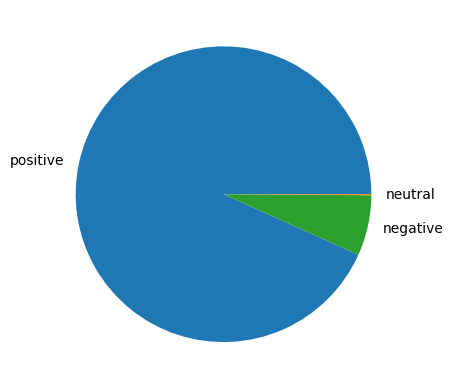

In [20]:
f = np.array([19112, 1356, 23])
mylabels = ['positive', 'negative', 'neutral']

colors = ['#1f77b4', '#2ca02c', '#ff7f0e']

plt.pie(f, labels = mylabels, colors=colors)
plt.show() 

In [21]:
# Counts of reviews
positive_count = 19112
negative_count = 1356
neutral_count = 23

# Total number of reviews
total_reviews = positive_count + negative_count + neutral_count

# Calculate percentages
positive_percentage = (positive_count / total_reviews) * 100
negative_percentage = (negative_count / total_reviews) * 100
neutral_percentage = (neutral_count / total_reviews) * 100

# Print percentages
print("Percentage of positive reviews:", positive_percentage, "%")
print("Percentage of negative reviews:", negative_percentage, "%")
print("Percentage of neutral reviews:", neutral_percentage, "%")


Percentage of positive reviews: 93.27021619247475 %
Percentage of negative reviews: 6.6175394075447755 %
Percentage of neutral reviews: 0.11224439998047925 %


We have about 93% percent of reviews as positive, about 6.6% percent of reviews as negative and about 0.1% of reviews as neutral, we can see there is a clear imbalance in the label, as we have positive sentiment accounting for almost all the observations.

Let's move on to feature selection, the imbalanced dataset will be handled with an imbalanced classifier that will balance our dataset

In [22]:
x = df['Review']

In [23]:
y = df['Sentiment']

In [24]:
x.shape

(20491,)

In [25]:
y.shape

(20491,)

**Splitting the data**

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

**Tfidf Vectorizer**

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
tfidf_vector = TfidfVectorizer(ngram_range=(1,1), lowercase = True, stop_words= 'english')

In [29]:
x_train = tfidf_vector.fit_transform(x_train)

In [30]:
x_test  = tfidf_vector.transform(x_test)

In order to properly represent document content for machine learning tasks, we use the TF-IDF Vectorizer to convert text data into numerical feature vectors based on the relevance of each word in the documents. This allows us to capture both frequency and rarity of each word.

**Training for decision trees**

In [31]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [32]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [33]:
classifier = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(x_train, y_train)

BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42,
                          sampling_strategy='not majority')

BalancedBaggingClassifier is a machine learning algorithm that combines multiple classifiers trained on balanced subsets of data to address imbalanced class distributions, and we chose 'not majority' to ensure that the minority classes receive more representation in the training samples than the majority class, thus improving model performance on minority classes.

In [44]:
y_hat = classifier.predict(x_test)

**Evaluation of decision trees**

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
accuracy = accuracy_score(y_hat, y_test)
rounded_accuracy = round(accuracy, 2)
print("Accuracy :", rounded_accuracy)

Accuracy : 0.93


In [47]:
precision_score(y_hat, y_test, average='weighted')

1.0

In [48]:
recall_score(y_hat, y_test, average='weighted')

0.933636955107352

In [49]:
f1_score(y_hat, y_test, average='weighted')

0.9656796769851952

**Training for logistic regression**

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
classif2 = BalancedBaggingClassifier(estimator=LogisticRegression(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classif2.fit(x_train, y_train)

BalancedBaggingClassifier(estimator=LogisticRegression(), random_state=42,
                          sampling_strategy='not majority')

**Evaluation for logistic regression**

In [52]:
y_hat_logistic = classif2.predict(x_test)

In [53]:
accuracy = accuracy_score(y_hat_logistic, y_test)
rounded_accuracy = round(accuracy, 2)
print("Accuracy :", rounded_accuracy)

Accuracy : 0.93


In [54]:
precision_score(y_hat_logistic, y_test, average='weighted')

1.0

In [55]:
recall_score(y_hat_logistic, y_test, average='weighted')

0.933636955107352

In [56]:
f1_score(y_hat_logistic, y_test, average='weighted')

0.9656796769851952

In [ ]:
classifier = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(),
                                sampling_strategy='not majority',
                                replacement=False,
                                random_state=42)
classifier.fit(x_train, y_train)

In [62]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Initialize the BalancedBaggingClassifier with RandomForestClassifier as estimator
classif = BalancedBaggingClassifier(estimator=RandomForestClassifier(),
                                    sampling_strategy='not majority',
                                    replacement=False,
                                    random_state=42)

# Fit the classifier
classif.fit(x_train, y_train)

Evaluation for Random Forest

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [70]:
y_hat = classifier.predict(x_test)

In [71]:
accuracy = accuracy_score(y_hat, y_test)
rounded_accuracy = round(accuracy, 2)
print("Accuracy :", rounded_accuracy)

Accuracy : 0.93


In [72]:
precision_score(y_hat_logistic, y_test, average='weighted')

1.0

In [73]:
recall_score(y_hat, y_test, average='weighted')

0.933636955107352

In [74]:
f1_score(y_hat_logistic, y_test, average='weighted')

0.9656796769851952

In [82]:
sample_input_data = ['I had a wonderful time, good hotel, good service']
sample_input_data_to_array =  (tfidf_vector.transform(sample_input_data).toarray())
classif.predict(sample_input_data_to_array)

array(['positive'], dtype=object)